In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [63]:
import sys
!{sys.executable} -m pip install tornado

In [4]:
import sys
!{sys.executable} -m pip install lifelines

    100% |████████████████████████████████| 215kB 1.4MB/s ta 0:00:01


In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [7]:
import os
print(os.getcwd())

/Users/trsv


In [43]:
draft_df = pd.read_csv("test_survival.csv")

In [44]:
draft_df.head()

,customer_id,curned,duration
0,701517912.0,1,0
1,745725901.0,0,0
2,834543642.0,0,0
3,865614273.0,0,0
4,891102542.0,0,0


In [45]:
kmf = KaplanMeierFitter() 

In [46]:
kmf.fit(durations = draft_df.duration, 
        event_observed = draft_df.curned)

<lifelines.KaplanMeierFitter: fitted with 1000 observations, 575 censored>

In [47]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,10,2,8,1000,1000
1,11,0,11,0,990
2,7,0,7,0,979
3,11,1,10,0,972
4,8,2,6,0,961
5,8,2,6,0,953
6,13,3,10,0,945
7,11,3,8,0,932
8,7,1,6,0,921


In [48]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]
# now calculate the survival probability for t = 0
surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

0.998

In [49]:
# Calculate the survival probability for t = 1
event_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

1.0

In [50]:
# Calculate the survival probability for t = 2
event_at_2 = kmf.event_table.iloc[2, :]
surv_for_2 =  (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

1.0

In [51]:
# The probability that an NFL player has a career longer than 2 years
surv_after_2 = surv_for_0 * surv_for_1 * surv_for_2
surv_after_2

0.998

In [52]:
kmf.predict(2)

0.99800000000000044

In [53]:
# The survival probabilities of NFL players after 1, 3, 5, and 10 yrs played
kmf.predict([1,5,10,15,30,60,90])

1     0.998000
5     0.992810
10    0.974549
15    0.941251
30    0.880695
60    0.641095
90    0.064179
Name: KM_estimate, dtype: float64

In [22]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.996000
1.0,0.985960
2.0,0.985960
3.0,0.981919
4.0,0.979890
5.0,0.976831
6.0,0.972735
7.0,0.963481
8.0,0.961405


In [54]:
kmf.median_

73.0

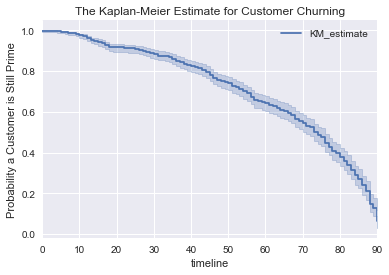

In [55]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Customer Churning")
plt.ylabel("Probability a Customer is Still Prime")

plt.show()

In [64]:
import tornado

In [65]:
notebook

UsageError: the following arguments are required: filename


In [66]:
ipython3 notebook

SyntaxError: invalid syntax (<ipython-input-66-8e0d33c55882>, line 1)